In [3]:
## Import modules

In [4]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
## Import file(Should put 'r' in front to avoid SyntaxError)

In [6]:
df_train=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\train.csv')

In [7]:
df_test=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\test.csv')

# Sex-Survival analysis

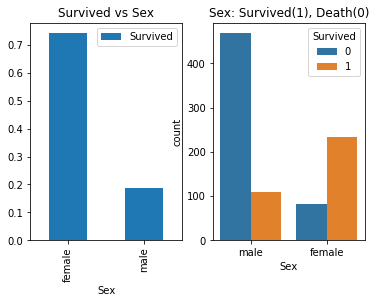

In [8]:
y_position=1.02
f, ax = plt.subplots(1, 2)
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived(1), Death(0)')
plt.show()

Women have better chance of survival.Let's analyze in percentage-wise. What % of women died and what % men died?

In [12]:
 df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


74% of women survived and 18.8% of men survived.

# Relationship between Survival-Sex and Pclass

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


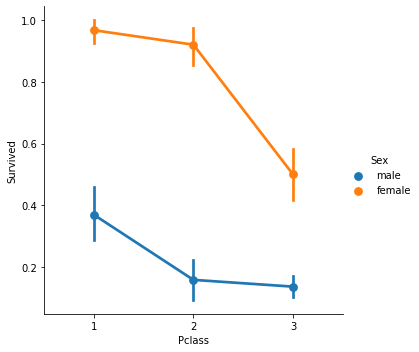

In [13]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)

(1) In all three classes female have better chance of survival then male. 
(2) Also, higher class has better chance of survival.

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


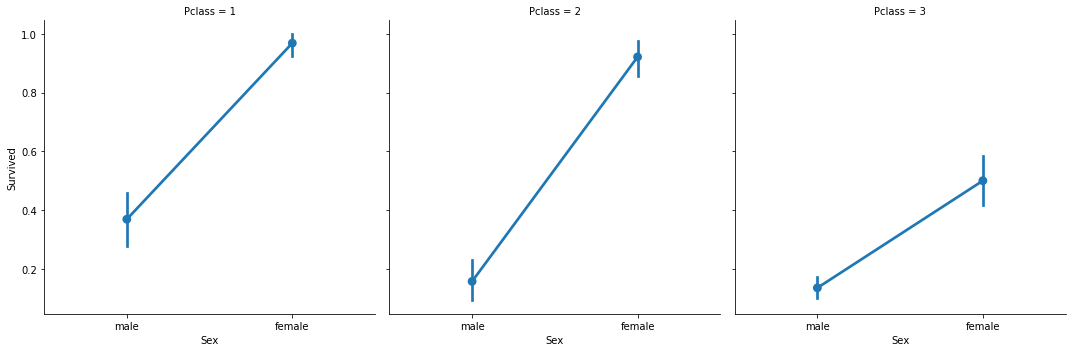

In [14]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train)

Clearly, in all three classes, women have higher chance of survival.

# Age-Survival analysis

{:}=surround the replacement field
{:.}=decimal places
1f=How many digits to be displayed [ex: 1f=0.1, 2f=0.11, 3f=0.111]
{:,}Number format with comma separator

In [33]:
print('Oldest passenger: {:.1f} Years'.format(df_train['Age'].max()))
print('Youngest passenger: {:.1f} Years'.format(df_train['Age'].min()))
print('Average passenger: {:.1f} Years'.format(df_train['Age'].mean()))

Oldest passenger: 80.0 Years
Youngest passenger: 0.4 Years
Average passenger: 29.7 Years


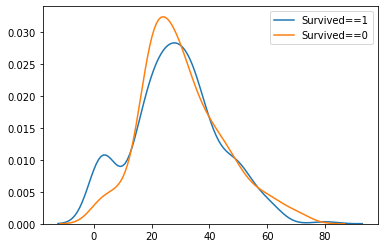

In [37]:
fig, ax=plt.subplots(1, 1)
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

The histogram shows that many age 0-10 survived while most 30 died.

Then how does survival rate differs by age?

Total number of passengers between aged 1-80 = 713

In [57]:
len(df_train[df_train['Age']<i])

713

The total number of people aged between 1-80 who survived=289

In [59]:
df_train[df_train['Age']<i]['Survived'].sum()

289

Total percentage of survival?=40%

In [61]:
df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i])

0.4053295932678822

Line graph showing the survival rate change based on age

Text(0.5, 0, 'Range of Age(0~x)')

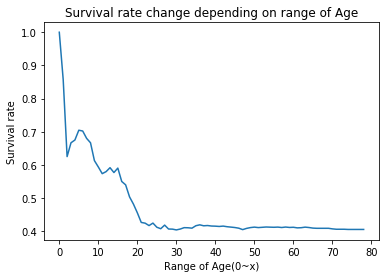

In [63]:
age_survival_ratio=[]
for i in range(1, 80):
    age_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]))

plt.plot(age_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

Conclusion: Younger age groups(especailly aged before 5) have higher chance of survival than older groups.